In [27]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# news = pd.read_csv('/Users/camillecu/Downloads/KUL/text_mining/abcnews-date-text.csv')
news = pd.read_csv('abcnews-date-text.csv')
news['publish_date'] = pd.to_datetime(news['publish_date'], format='%Y%m%d')
news['year'] = news['publish_date'].dt.year
news.head()

,publish_date,headline_text,year
0,2003-02-19,aba decides against community broadcasting lic...,2003
1,2003-02-19,act fire witnesses must be aware of defamation,2003
2,2003-02-19,a g calls for infrastructure protection summit,2003
3,2003-02-19,air nz staff in aust strike for pay rise,2003
4,2003-02-19,air nz strike to affect australian travellers,2003


In [3]:
news.shape

(1244184, 3)

Perform the following tasks:
1. Apply the Latent Semantic Analysis and Latent Dirichlet Allocation technique to study the topic focus of ABC’s news headlines. Characterize them by exploring the most frequent words in each topic.


Preprocess the data:
Remove stopwords, punctuation, and special characters
Convert text to lowercase
Tokenize the headlines
Apply lemmatization or stemming

In [5]:
import nltk
nltk.download('wordnet')  # For lemmatization
nltk.download('omw-1.4')  # Optional: For multilingual WordNet
nltk.download('stopwords')  # For the stopwords list
nltk.download('punkt')  # For word tokenization


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhangnaichuan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/zhangnaichuan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhangnaichuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhangnaichuan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return ' '.join(tokens)

# Apply the preprocess_text function to each row in the 'headline_text' column
news['processed_text'] = news['headline_text'].apply(preprocess_text)


Creating a document-term matrix using TF-IDF vectorization is essential for several reasons:

1. Numerical representation: It converts text data into a structured, numerical format suitable for machine learning algorithms[2]. This is crucial because most ML models require numerical inputs.

2. Capturing word importance: TF-IDF scores reflect the importance of a word in a document relative to the entire corpus[1]. This helps in identifying key terms that are more relevant to each document.

3. Balancing frequency and uniqueness: TF-IDF balances the term frequency (how often a word appears in a document) with its inverse document frequency (how rare or common a word is across all documents)[5]. This provides a more nuanced representation of the text data.

4. Improved text analysis: By considering both the importance of terms within documents and across the corpus, TF-IDF allows for more effective text analysis in tasks such as classification, clustering, and information retrieval[2].

5. Addressing common word bias: TF-IDF helps mitigate the issue of common words dominating the analysis by giving higher weight to terms that are specific to particular documents[1][5].

6. Feature extraction: The resulting document-term matrix serves as a set of features that can be used for various NLP tasks, including document classification, sentiment analysis, and topic modeling[2][5].

By creating a document-term matrix using TF-IDF vectorization, we transform raw text into a format that captures the semantic importance of words, enabling more accurate and meaningful analysis in natural language processing applications.

Citations:
[1] https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/
[2] https://app.studyraid.com/en/read/2545/51592/tf-idf-vectorization
[3] https://hackernoon.com/document-term-matrix-in-nlp-count-and-tf-idf-scores-explained
[4] https://openclassrooms.com/en/courses/6532301-introduction-to-natural-language-processing/8081363-apply-the-tf-idf-vectorization-approach
[5] https://letsdatascience.com/tf-idf/
[6] https://stackoverflow.com/questions/33510938/is-using-tf-idf-for-classification-task-like-sentiment-analysis-task-correct
[7] https://www.learndatasci.com/glossary/tf-idf-term-frequency-inverse-document-frequency/

In [7]:
# Create TF-IDF matrix
vectorizer = TfidfVectorizer(max_features=5000)
# max_features=5000, which limits the number of features (unique words) to the top 5000 most frequent terms in the corpus. This helps in reducing the dimensionality of the feature space and can improve the performance of subsequent machine learning models.
tfidf_matrix = vectorizer.fit_transform(news['processed_text'])
tfidf_matrix.shape


(1244184, 5000)

In [15]:
# Bag of Words Representation
count_vectorizer = CountVectorizer(max_features=5000)
count_matrix = count_vectorizer.fit_transform(news['processed_text'])

In [9]:
# Apply LSA
n_topics = 8
lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(tfidf_matrix)

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topic_matrix = lda_model.fit_transform(tfidf_matrix)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [10]:
# Function to print top words for each topic
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")


In [11]:
# Print LSA topics
print("LSA Topics:")
print_top_words(lsa_model, vectorizer.get_feature_names_out())

LSA Topics:
Topic 1: interview, police, man, extended, new, charged, court, murder, crash, michael
Topic 2: police, man, charged, court, new, murder, crash, death, woman, say
Topic 3: man, charged, murder, police, court, dy, jailed, charge, stabbing, missing
Topic 4: police, probe, investigate, officer, search, hunt, arrest, missing, seek, driver
Topic 5: new, police, zealand, man, year, case, york, open, charged, home
Topic 6: fire, crash, australia, win, car, dy, rural, australian, day, house
Topic 7: australia, say, abc, win, news, day, court, world, rural, face
Topic 8: rural, news, national, abc, market, nsw, council, business, court, police


In [12]:
# Print LDA topics
print("\nLDA Topics:")
print_top_words(lda_model, vectorizer.get_feature_names_out())


LDA Topics:
Topic 1: day, test, australia, world, win, final, cup, india, england, festival
Topic 2: year, killed, kill, dead, police, attack, man, sydney, iraq, one
Topic 3: coast, gold, police, ban, search, driver, shark, beach, game, afl
Topic 4: interview, say, talk, trump, pm, election, speaks, president, call, new
Topic 5: market, rural, news, price, abc, country, share, record, weather, rate
Topic 6: court, child, accused, sex, trial, charge, face, man, abuse, hospital
Topic 7: man, police, crash, fire, death, woman, found, charged, car, missing
Topic 8: plan, council, govt, change, new, water, government, funding, call, group


In [35]:
lda_topics = []
terms = count_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    top_terms = [terms[i] for i in topic.argsort()[-10:]]
    lda_topics.append(top_terms)
    print(f"Topic {topic_idx + 1}: {top_terms}")

Topic 1: ['festival', 'england', 'india', 'cup', 'final', 'win', 'world', 'australia', 'test', 'day']
Topic 2: ['one', 'iraq', 'sydney', 'man', 'attack', 'police', 'dead', 'kill', 'killed', 'year']
Topic 3: ['afl', 'game', 'beach', 'shark', 'driver', 'search', 'ban', 'police', 'gold', 'coast']
Topic 4: ['new', 'call', 'president', 'speaks', 'election', 'pm', 'trump', 'talk', 'say', 'interview']
Topic 5: ['rate', 'weather', 'record', 'share', 'country', 'abc', 'price', 'news', 'rural', 'market']
Topic 6: ['hospital', 'abuse', 'man', 'face', 'charge', 'trial', 'sex', 'accused', 'child', 'court']
Topic 7: ['missing', 'car', 'charged', 'found', 'woman', 'death', 'fire', 'crash', 'police', 'man']
Topic 8: ['group', 'call', 'funding', 'government', 'water', 'new', 'change', 'govt', 'council', 'plan']


In [36]:
terms = vectorizer.get_feature_names_out()
lsa_topics = []
for i, comp in enumerate(lsa_model.components_):
    top_terms = [terms[i] for i in comp.argsort()[-10:]]
    lsa_topics.append(top_terms)
    print(f"Topic {i+1}: {top_terms}")

Topic 1: ['michael', 'crash', 'murder', 'court', 'charged', 'new', 'extended', 'man', 'police', 'interview']
Topic 2: ['say', 'woman', 'death', 'crash', 'murder', 'new', 'court', 'charged', 'man', 'police']
Topic 3: ['missing', 'stabbing', 'charge', 'jailed', 'dy', 'court', 'police', 'murder', 'charged', 'man']
Topic 4: ['driver', 'seek', 'missing', 'arrest', 'hunt', 'search', 'officer', 'investigate', 'probe', 'police']
Topic 5: ['home', 'charged', 'open', 'york', 'case', 'year', 'man', 'zealand', 'police', 'new']
Topic 6: ['house', 'day', 'australian', 'rural', 'dy', 'car', 'win', 'australia', 'crash', 'fire']
Topic 7: ['face', 'rural', 'world', 'court', 'day', 'news', 'win', 'abc', 'say', 'australia']
Topic 8: ['police', 'court', 'business', 'council', 'nsw', 'market', 'abc', 'national', 'news', 'rural']


2. How do these topics evolve through time in the ABC news headlines?

In [28]:
news["lsa_topic"] = np.argmax(lsa_topic_matrix, axis=1)
news['lda_topic'] = lda_topic_matrix.argmax(axis=1)

In [29]:
# Group by year to analyze topic evolution
lsa_trends = news.groupby('year')['lsa_topic'].value_counts().unstack(fill_value=0)
lda_trends = news.groupby('year')['lda_topic'].value_counts().unstack(fill_value=0)

In [30]:
lda_trends

lda_topic,0,1,2,3,4,5,6,7
year,,,,,,,,
2003,7193,9035,5724,7437,6260,7106,6288,14954
2004,7360,9326,6756,8126,7110,8701,7805,17490
2005,6833,8476,6752,7368,7153,9665,8336,18541
2006,6103,7248,6039,7881,6530,8437,7777,16886
2007,6661,8234,7245,9251,7226,9227,9807,19523
2008,7378,8831,7917,10135,8362,9535,9943,17890
2009,7453,8199,7879,9067,8776,8634,10747,15689
2010,7881,8200,8006,9774,7614,8739,9848,14869
2011,8387,8861,7998,8981,9647,8325,10126,15453


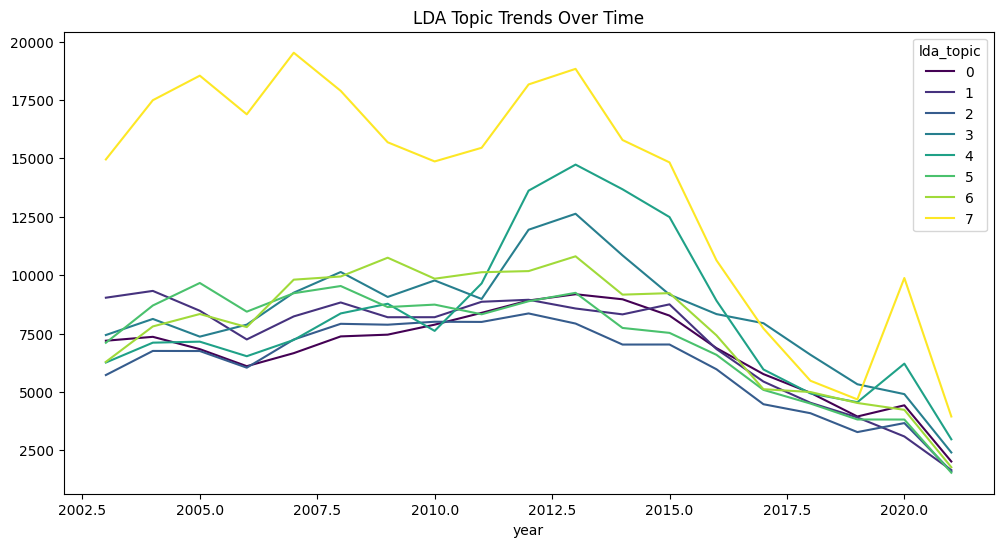

In [31]:
# Plot trends
lda_trends.plot(title="LDA Topic Trends Over Time", figsize=(12, 6), colormap='viridis')
plt.show()

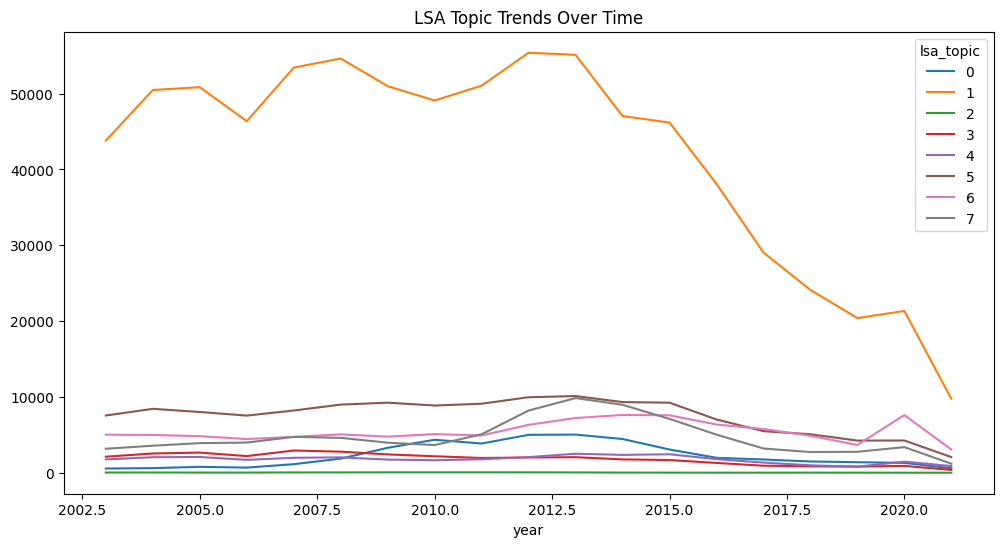

In [32]:
lsa_trends.plot(title="LSA Topic Trends Over Time", figsize=(12, 6))
plt.show()

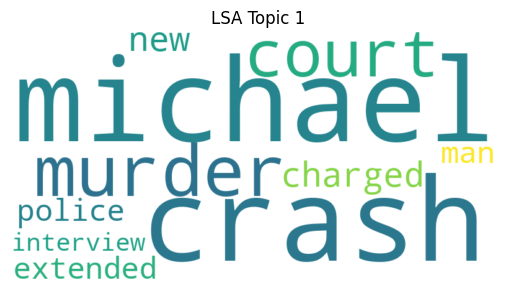

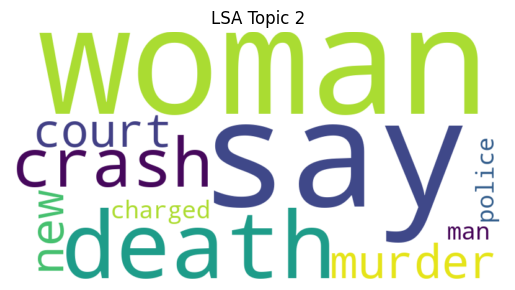

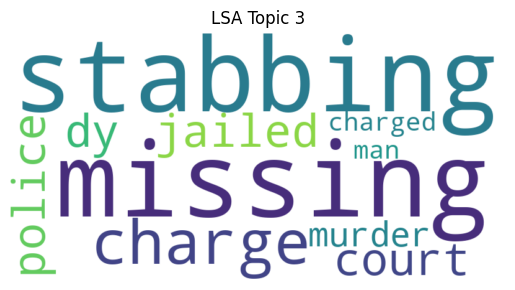

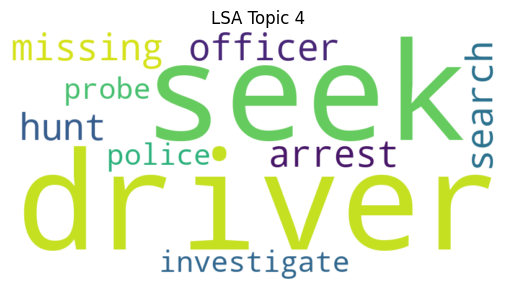

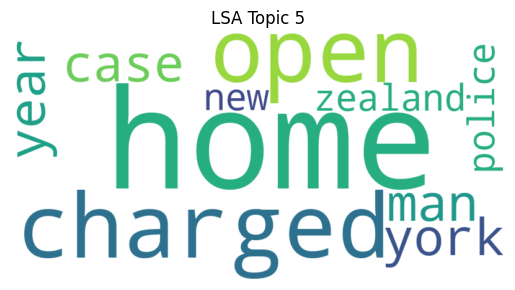

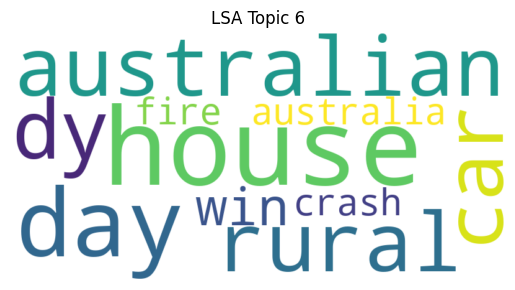

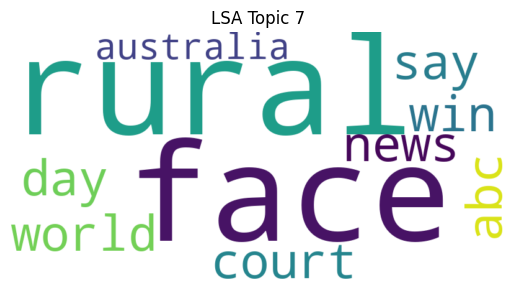

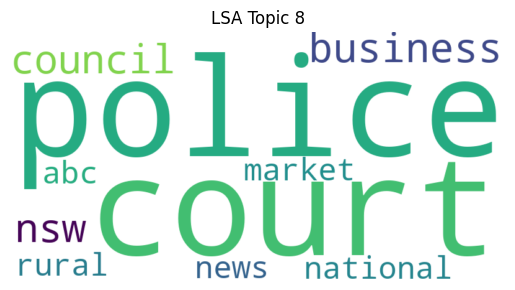

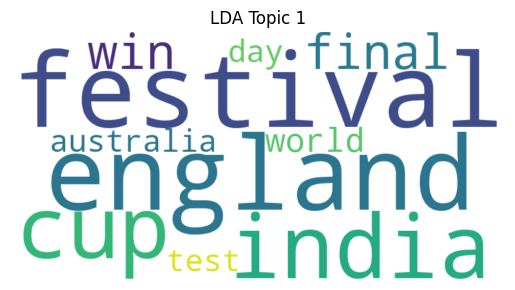

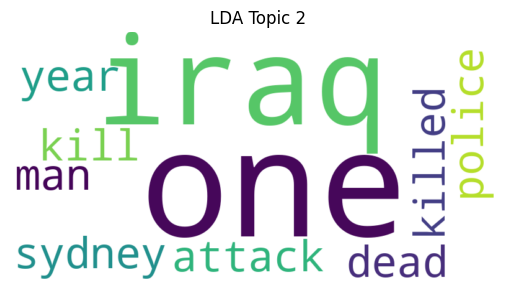

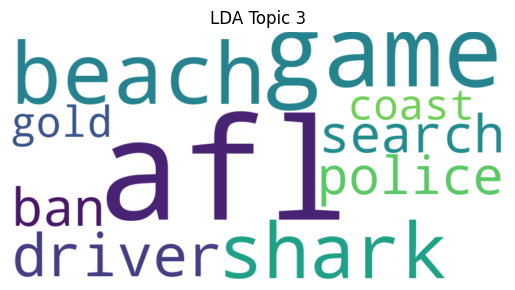

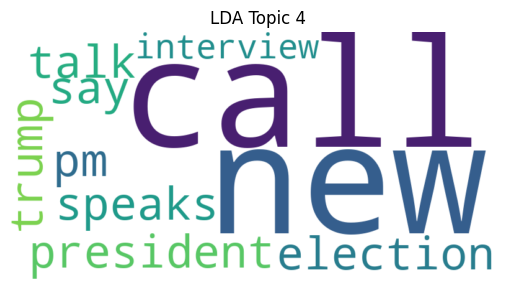

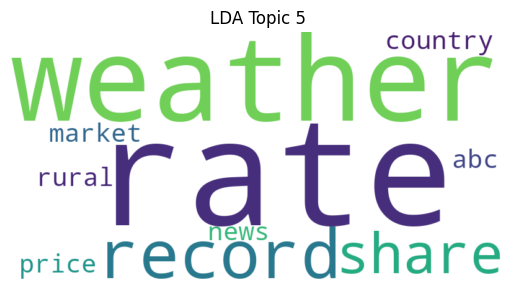

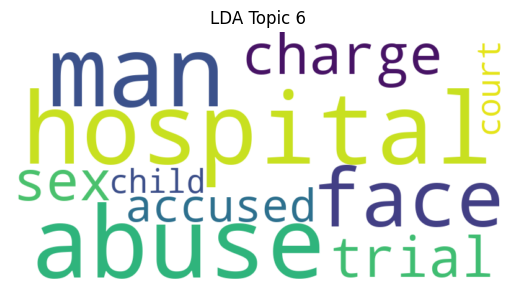

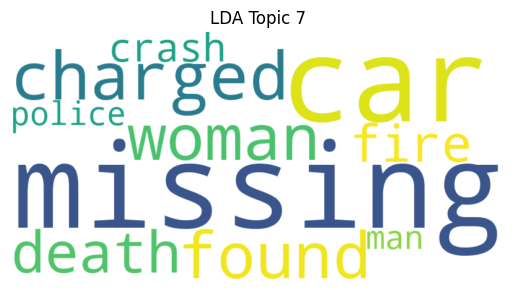

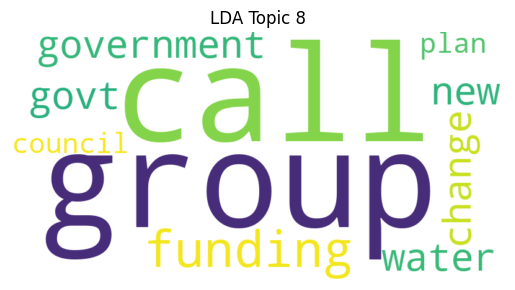

In [37]:
# Word clouds for LSA topics
for i, terms in enumerate(lsa_topics):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(terms))
    plt.figure()
    plt.title(f"LSA Topic {i+1}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

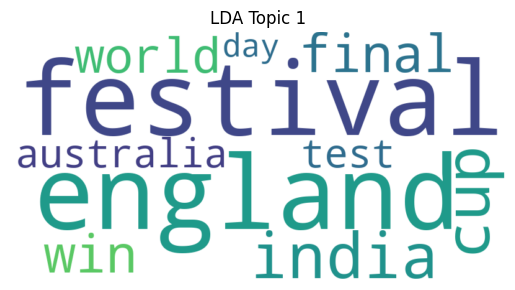

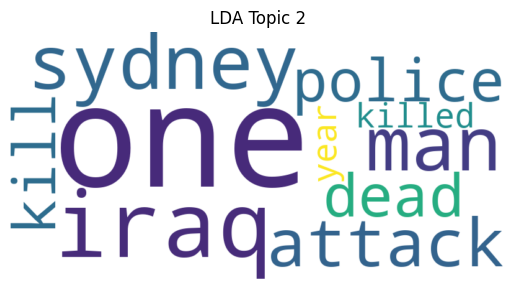

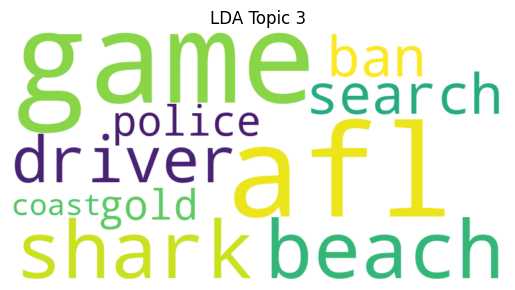

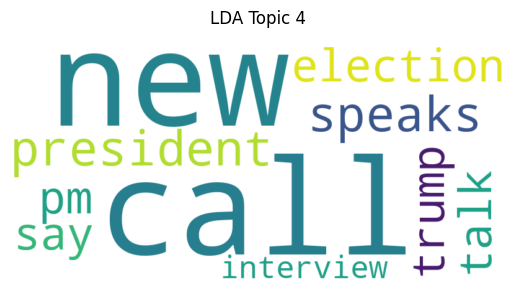

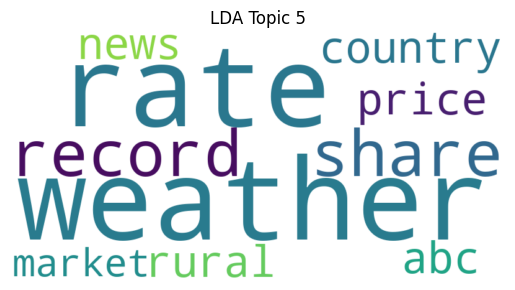

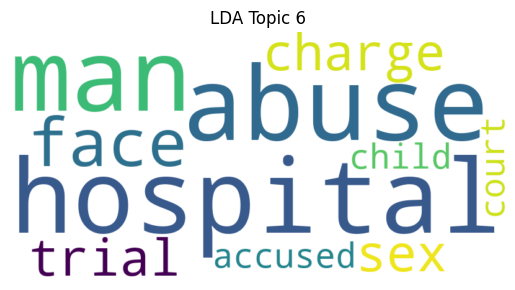

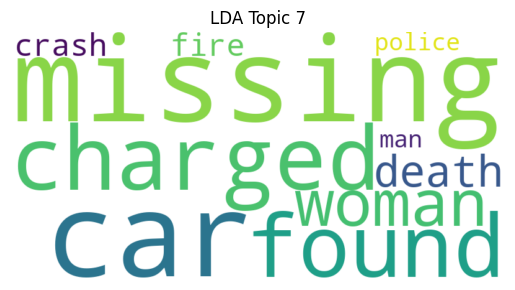

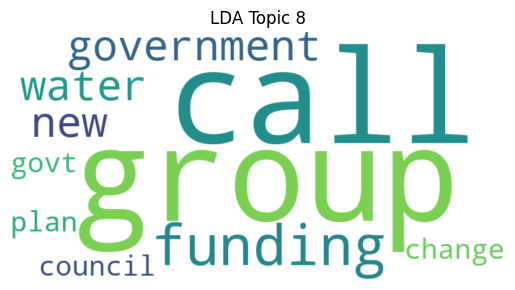

In [38]:
# Word clouds for LDA topics
for i, terms in enumerate(lda_topics):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(terms))
    plt.figure()
    plt.title(f"LDA Topic {i+1}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()